# The following model I developed, by following the [Data School Course](https://github.com/justmarkham/pycon-2016-tutorial). In the course, Kevin describes the deveoplment of the Machine learning model for text. In his tutorial, Kevin only used count vectorizer method for vectorization and multinomial Naive Bayes model for building the model. However, I try to to do something different. Instead of one I used two vectorization methods and two machine learning model. later then I used confusion matrix approach to comapre the different models accuracy. In the end, I presented which naive bays model works well with two different vectorizer method. 

PS: I'm new-bie in data science area. So, I beleive I have made mistakes, If so your valuable response will help me to grow. In the end, I want to Thank Kavin for the wonderful and clearly description of this tutorial.

Thank you.

# #Task 1: Get familier with the data
#Import the necessary libraries
#Read yelp.csv into a pandas DataFrame and examine it
#Reading a text-based dataset into pandas

In [1]:
#Python libraries for exploring and manipulating data

# Libraries for data analysis and data wrangling
import pandas as pd
import numpy as np

# Python libraries for visualization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# save filepath and read file into pandas from a URL for easier access
url  = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/yelp.csv'

# read the data and store data in DataFrame titled yelp
yelp = pd.read_csv(url)

# Examine the shape of the data set
print(yelp.shape)

(10000, 10)


In [3]:
# examine the first 5 rows of the yelp data
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
# examine the random 5 rows of the yelp data
yelp.sample(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
8600,is-olmqaSZ0KCoe-_ftW5w,2011-03-21,_0Y6QAT1dBOVmYOXIoVpKw,4,Tough to rank this place... it is a retireme...,review,LZZNgNIuA2W4mn-5LLH24g,0,0,0
6889,KBG28p3lGX17hOPoHhq5PQ,2008-02-15,o1twR2pI5yE6xE0HnRGnIQ,5,"Sushi is not just a meal, it's an experience.....",review,GZFiCRwm-bVauSRtTKhb4g,4,3,0
9469,SjFl_V6BTGkmv4tbub-AVw,2008-09-04,XeD6j_ItpmuTjas2Z8A1rw,4,PBR. Mad Dog 20/20. What??!! I was a witness t...,review,ZqMS4ElQg-k1tQBC06h7lQ,6,6,3
3401,LMG0zsAkUSscIvmV9vvm3A,2010-09-21,QyHVsAOYH-vIdiIqpYS8dg,5,I just celebrated my birthday at Oregano's. I...,review,OjPYJxpkm_xDIiZAquMEIA,0,0,0
6072,1crzPdwnlm2zHdQ2nP4n7w,2011-02-08,HZvzvZaXpp7q-tIaI2QBaA,5,Imagine a white silk wedding dress.... black! ...,review,PNS9z4aFDbfhpIsHCfNvNg,0,2,0


In [5]:
# examine the last 5 rows of the yelp data
yelp.tail(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [6]:
#Examine the choice of rows using slice index
yelp[100:105]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
100,CrBsdxqOjPdnfsDxV89GJQ,2010-02-17,SmUMyCUNrT9HEo_DXdgUuQ,4,I have to admit that I find myself thinking th...,review,bZFRqP7s0Vszxeu8_IwYow,0,1,0
101,m9Wqqma30o-hH2fAX7dnug,2011-03-14,oTB_mpCKcu-8wayQQuCDZw,5,"Best food, super friendly staff, and great pri...",review,FpCmGLWHe5Y-kDS7ZYaF5w,0,1,0
102,M3zLQRbSF_VcGukkzxXc4w,2010-06-15,1e_YRoF0lrA9-4tvdym_Sg,5,Christy is an amazing cake artist. She has an...,review,_w_hrcZ-9uObIBepDmLJwg,0,0,0
103,LzpR_jE6VIutJ08s2cdRrw,2011-02-19,WqLc0KSfMHGoWNtvPque5w,4,"OK, Sweet Pea and I love us some Coup, and it'...",review,GVH_iuoPc0aP3ZNYlWuKag,0,0,0
104,WaO_hAunQrZ--vI308rHQA,2011-06-06,4jkSNOjZN-35vo1_Z2SL7w,3,Great food and awesome service! Even better th...,review,qT17WVkJi0RvQ4nNPN6NDw,1,0,0


In [7]:
yelp[['stars','text']].head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [8]:
# Examine the data type of all features and target
print(yelp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB
None


In [9]:
# examine the class distribution

#sort_index will sort indexes
sort_indexes = pd.DataFrame(yelp.stars.value_counts(dropna=False).sort_index())

#sort_values will sort values
sort_values = pd.DataFrame(yelp.stars.value_counts().sort_values())

print(sort_indexes)
print('_'*40)
print(sort_values)

   stars
1    749
2    927
3   1461
4   3526
5   3337
________________________________________
   stars
1    749
2    927
3   1461
5   3337
4   3526


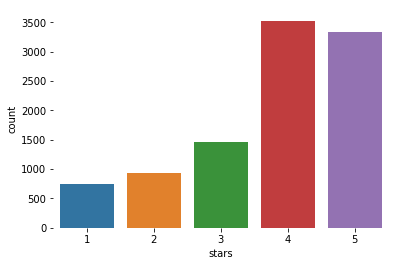

In [46]:
#yelp['stars'].value_counts().plot.bar()
#sb.distplot(yelp['stars']);
sb.countplot(yelp['stars'],);
#code to remove outer line from the graph
sb.despine(bottom=True, left=True)

# Task 2: Create a new dataset
#Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [22]:
# This exercise will only classify worst rating(1 star) or best rating (5 star).hence, we will create a new 
#data frame which only contains the 5 star and 1 star review rating.
yelp_worst_best = yelp[(yelp.stars == 5) | (yelp.stars == 1)]

#examine the random 10 samples from the new data set "yelp_worst_best".
yelp_worst_best.sample(10,random_state=5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9682,wzP2yNpV5p04nh0injjymA,2011-01-06,OAn4Mio4vlY5VjTTug6kjQ,5,This is thee place to indulge your sweet tooth...,review,1zjPzcFdboSqis0Fkhccdg,0,0,0
7222,6Tt0mGKbMoAz1GsjkVhbMQ,2012-05-25,YTzrrPFgcC7DjAr2Qp8U2g,5,Really delicious breakfast burritos! They are ...,review,mVPISwK-W6gmlbR5oemOsQ,0,1,0
9558,Y-ci4KjSUdwfc6ru4XnX8Q,2008-06-03,UlLg43QG5zJoKmq0t6PULQ,5,Treated some clients to Sweet Pea Bakery items...,review,XBHJCDzNh--mBhJkzyM_iA,2,3,0
4656,8HmSt7fRFe-uH6i4yCmJQQ,2008-09-04,T3dnb2VW9IEE-aAYccG-rA,1,I do not like this KFC ...or any really for th...,review,JkMOQaMjlBHMqp6gj-hL3w,1,2,0
5314,pfTwzep_4hRTX_jXoi38cw,2011-06-02,OdzhxCxBxVkJjEJUDTI9oQ,1,The food was not particularly good on our last...,review,cxjTpWMPg7u5Bb9OPWqaFw,1,1,0
3091,8t80-omyflkywRfu9LPh6g,2011-04-19,mEFozJbPZHUm6YQo-uGG2g,5,This is my favorite seafood place in Phoenix!!...,review,X_kPh3nt0AJPNPHye2rTlA,2,3,0
9574,QnAzW6KMSciUcuJ20oI3Bw,2010-06-01,wcpepBjeZuz0cQKupbB_YA,5,This place is great!!! They grow alot of the f...,review,47VCrr83Tvtkp1FvDa0ftQ,2,0,0
798,L9UYbtAUOcfTgZFimehlXw,2011-07-27,J5kIrC9Sx8il8DZkOhVOgQ,5,Just perfect !!! For what it is!!! Down to t...,review,l2srZt-GNvF7tMotR_VyAw,0,0,0
9202,b5cEoKR8iQliq-yT2_O0LQ,2010-03-09,c7UBikwEOZfG2kTUQ3M3EA,5,Great surprise-- I have driven by this place s...,review,76SlIVfcXJujKQ3xSyYtOQ,0,1,0
7111,Tt6DYs0TyERWHWW5xiRL_A,2011-01-18,oNWasO70MB71PSw00rN5vQ,5,Yen has amazing sushi. I would say that they h...,review,IqrtFpXjwUhJNd28LUOOeg,0,0,0


In [23]:
# Examine the shape of the new data set "yelp_worst_best".
yelp_worst_best.shape

(4086, 10)

5    3337
1     749
Name: stars, dtype: int64


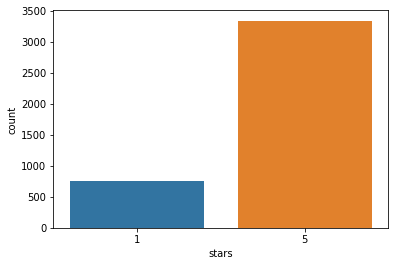

In [24]:
# examine the class distribution for new data set "yelp_worst_best".
print(yelp_worst_best.stars.value_counts(dropna= False))
sb.countplot(yelp_worst_best.stars)

# Task 3: Splitting the dataset into X and y object 
#Define X and y from the new DataFrame
#Split X and y into training and testing sets, using the review text as the only feature and the star rating as the response


#Things to know: I have used here "train_test_split" methods

In further steps I will use this method with 2 different vectorizarion methods i.e. "CountVectorizer" and "TfidfVectorizer". 

In [25]:
#define X and y (from the yelp_worst_best data set) for use with COUNTVECTORIZER
X = yelp_worst_best.text
y = yelp_worst_best.stars

# Examine the shape of X and y before spliting the data set
print(X.shape)
print(y.shape)


(4086,)
(4086,)


In [26]:
# split X and y into training and testing sets
#Method 1: "train_test_split" method

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

# Examine the shape of object (X_tarin, X_test, y_train and y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3064,)
(1022,)
(3064,)
(1022,)


/Users/ketansahu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Task 4: Vectorizing the dataset with different methods
#Use CountVectorizer and TfidfVectorizer to create document-term matrices from X_train and X_test.

#Things to know: I have used here 2 methods for vectorization.These methods are:

Method 1: CountVectorizer (CV)

Method 2: TfidfVectorizer (TV)


In the model building and evaluation process, all above methods will be tested with MultinomialNB and Linear regression classifier.

In [27]:
#Method 1: CountVectorizer (by using train_test_split method)

# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# instantiate the vectorizer
vect_CV = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit and transform X_train into X_train_dtm_CV
X_train_dtm_CV = vect_CV.fit_transform(X_train)
# examine the document-term matrix
X_train_dtm_CV

<3064x16825 sparse matrix of type '<type 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [28]:
# transform testing data (using fitted vocabulary) into a document-term matrix
# transform X_test into X_test_dtm_CV
X_test_dtm_CV = vect_CV.transform(X_test)
X_test_dtm_CV

<1022x16825 sparse matrix of type '<type 'numpy.int64'>'
	with 77006 stored elements in Compressed Sparse Row format>

In [29]:
#Method 2: TfidfVectorizer (by using train_test_split method)

# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# instantiate the vectorizer
vect_TV = TfidfVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit and transform X_train into X_train_dtm_TV
X_train_dtm_TV = vect_TV.fit_transform(X_train)
# examine the document-term matrix
X_train_dtm_TV

<3064x16825 sparse matrix of type '<type 'numpy.float64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [30]:
# transform testing data (using fitted vocabulary) into a document-term matrix
# transform X_test into X_test_dtm_TV
X_test_dtm_TV = vect_TV.transform(X_test)
X_test_dtm_TV

<1022x16825 sparse matrix of type '<type 'numpy.float64'>'
	with 77006 stored elements in Compressed Sparse Row format>

In [31]:
#vect.fit(train) learns the vocabulary of the training data
#vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
#vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

# Task 5: Building and evaluating a model
#Use multinomial Naive Bayes to predict the star rating for the reviews in the testing set
#Use Logistic Regression to compare the models
#Calculate the accuracy.

In [32]:
# import the MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# instantiate the MultinomialNB
nb_CV= MultinomialNB()
# train the model using X_train_dtm_CV and y_train
nb_CV.fit(X_train_dtm_CV,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# import the MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# instantiate the MultinomialNB
nb_TV= MultinomialNB()
# train the model using X_train_dtm_TV and y_train
nb_TV.fit(X_train_dtm_TV,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
# import the Logistic regression model
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model
logreg_CV= LogisticRegression()
# train the model using X_train_dtm_CV and y_train
logreg_CV.fit(X_train_dtm_CV,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# import the Logistic regression model
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model
logreg_TV= LogisticRegression()
# train the model using X_train_dtm_TV and y_train
logreg_TV.fit(X_train_dtm_TV,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# make class predictions for X_test_dtm_CV and X_test_dtm_TV (for MultinomialNB and regression model )

#MultinomialNB Model
y_predict_class_nb_CV = nb_CV.predict(X_test_dtm_CV)
print("The Class prediction of count vectorizer based multinomialNB Model is",y_predict_class_nb_CV)
print('_'*40)
y_predict_class_nb_TV = nb_TV.predict(X_test_dtm_TV)
print("The Class prediction of TfidfVectorizer based multinomialNB Model is",y_predict_class_nb_TV)
print('_'*40)

#Regression model
y_predict_class_logreg_CV = logreg_CV.predict(X_test_dtm_CV)
print("The Class prediction of count vectorizer based Regression Model is",y_predict_class_logreg_CV)
print('_'*40)
y_predict_class_logreg_TV = logreg_TV.predict(X_test_dtm_TV)
print("The Class prediction of TfidfVectorizer based Regression Model is",y_predict_class_logreg_TV)

('The Class prediction of count vectorizer based multinomialNB Model is', array([5, 5, 5, ..., 5, 1, 5]))
________________________________________
('The Class prediction of TfidfVectorizer based multinomialNB Model is', array([5, 5, 5, ..., 5, 5, 5]))
________________________________________
('The Class prediction of count vectorizer based Regression Model is', array([5, 1, 5, ..., 5, 1, 5]))
________________________________________
('The Class prediction of TfidfVectorizer based Regression Model is', array([5, 5, 5, ..., 5, 1, 5]))


In [37]:
# Calculate accuracy of class predictions (for MultinomialNB and regression model )
#Classification accuracy: percentage of correct predictions
from sklearn import metrics

#MultinomialNB Model
accuracy_MultinomialNB_CV = metrics.accuracy_score(y_test,y_predict_class_nb_CV)
print("Classification accuracy of count vectorizer based multinomialNB Model is:" ,accuracy_MultinomialNB_CV)
print('_'*100)
accuracy_MultinomialNB_TV = metrics.accuracy_score(y_test,y_predict_class_nb_TV)
print("Classification accuracy of TfidfVectorizer based multinomialNB Model is",accuracy_MultinomialNB_TV)
print('_'*100)
#Regression model
accuracy_Regression_CV = metrics.accuracy_score(y_test,y_predict_class_logreg_CV)
print("Classification accuracy of count vectorizer based Regression Model is",accuracy_Regression_CV)
print('_'*100)
accuracy_MultinomialNB_TV = metrics.accuracy_score(y_test,y_predict_class_nb_TV)
print("Classification accuracy of TfidfVectorizer based Regression Model is",accuracy_MultinomialNB_TV)

('Classification accuracy of count vectorizer based multinomialNB Model is:', 0.9187866927592955)
____________________________________________________________________________________________________
('Classification accuracy of TfidfVectorizer based multinomialNB Model is', 0.8199608610567515)
____________________________________________________________________________________________________
('Classification accuracy of count vectorizer based Regression Model is', 0.9256360078277887)
____________________________________________________________________________________________________
('Classification accuracy of TfidfVectorizer based Regression Model is', 0.8199608610567515)


In [38]:
#null accuracy 
#accuracy that could be achieved by always predicting the most frequent class

# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

5    838
1    184
Name: stars, dtype: int64

5    0.819961
Name: stars, dtype: float64


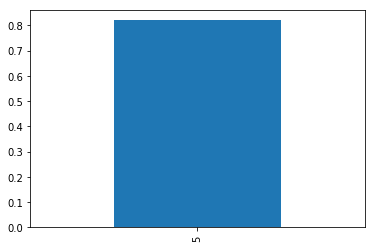

In [39]:
# calculate null accuracy (for binary classification problems coded as 0/1)
#max(y_test.mean(), 1 - y_test.mean())
# calculate null accuracy (for multi-class classification problems)
print(y_test.value_counts().head(1) / len(y_test))
(y_test.value_counts().head(1) / len(y_test)).plot.bar()

In [40]:
# print the first 20 true and predicted responses (for MultinomialNB and regression model )

#MultinomialNB Model
print("Count vectorizer based multinomialNB Model")
print('True:',y_test.values[0:20])
print('Pred:',y_predict_class_nb_CV[0:20])
print('_'*100)
print("TfidfVectorizer based multinomialNB Model")
print('True:',y_test.values[0:20])
print('Pred:',y_predict_class_nb_TV[0:20])
print('_'*100)
#Regression model
print("Count vectorizer based regression Model")
print('True:',y_test.values[0:20])
print('Pred:',y_predict_class_logreg_CV[0:20])
print('_'*100)
print("TfidfVectorizer based regression Model")
print('True:',y_test.values[0:20])
print('Pred:',y_predict_class_nb_TV[0:20])


Count vectorizer based multinomialNB Model
('True:', array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 1]))
('Pred:', array([5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1]))
____________________________________________________________________________________________________
TfidfVectorizer based multinomialNB Model
('True:', array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 1]))
('Pred:', array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))
____________________________________________________________________________________________________
Count vectorizer based regression Model
('True:', array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 1]))
('Pred:', array([5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5]))
____________________________________________________________________________________________________
TfidfVectorizer based regression Model
('True:', array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 

# Task 6: Examine the models with confusion matrix

In [41]:
# print the confusion matrix (for MultinomialNB and regression model )

#MultinomialNB Model
confusion_MultinomialNB_CV= metrics.confusion_matrix(y_test, y_predict_class_nb_CV)
print(confusion_MultinomialNB_CV)
print('_'*100)
confusion_MultinomialNB_TV= metrics.confusion_matrix(y_test, y_predict_class_nb_TV)
print(confusion_MultinomialNB_TV)
print('_'*100)
#Regression model
confusion_Regression_CV= metrics.confusion_matrix(y_test, y_predict_class_logreg_CV)
print(confusion_Regression_CV)
print('_'*100)
confusion_Regression_TV= metrics.confusion_matrix(y_test, y_predict_class_logreg_TV)
print(confusion_Regression_TV)

[[126  58]
 [ 25 813]]
____________________________________________________________________________________________________
[[  0 184]
 [  0 838]]
____________________________________________________________________________________________________
[[140  44]
 [ 32 806]]
____________________________________________________________________________________________________
[[ 82 102]
 [  9 829]]


In [42]:
# save confusion matrix and slice into four pieces (for MultinomialNB and regression model )

#MultinomialNB Model
TP_MultinomialNB_CV = confusion_MultinomialNB_CV[1, 1]
TN_MultinomialNB_CV = confusion_MultinomialNB_CV[0, 0]
FP_MultinomialNB_CV = confusion_MultinomialNB_CV[0, 1]
FN_MultinomialNB_CV = confusion_MultinomialNB_CV[1, 0]

TP_MultinomialNB_TV = confusion_MultinomialNB_TV[1, 1]
TN_MultinomialNB_TV = confusion_MultinomialNB_TV[0, 0]
FP_MultinomialNB_TV = confusion_MultinomialNB_TV[0, 1]
FN_MultinomialNB_TV = confusion_MultinomialNB_TV[1, 0]


#Regression model
TP_Regression_CV = confusion_Regression_CV[1, 1]
TN_Regression_CV = confusion_Regression_CV[0, 0]
FP_Regression_CV = confusion_Regression_CV[0, 1]
FN_Regression_CV = confusion_Regression_CV[1, 0]

TP_Regression_TV = confusion_Regression_TV[1, 1]
TN_Regression_TV = confusion_Regression_TV[0, 0]
FP_Regression_TV = confusion_Regression_TV[0, 1]
FN_Regression_TV = confusion_Regression_TV[1, 0]


#True Positives (TP): we correctly predicted that rating is 5 star
#True Negatives (TN): we correctly predicted that rating is 1 star
#False Positives (FP): we incorrectly predicted that rating is 5 star(a "Type I error")
#False Negatives (FN): we incorrectly predicted that rating is 1 star (a "Type II error")

In [45]:
#Classification accuracy: (for MultinomialNB and regression model )
#Overall, how often is the classifier correct?

#MultinomialNB Model
print("Classification accuracy of count vectorizer based multinomialNB Model is",(TP_MultinomialNB_CV + TN_MultinomialNB_CV) / float(TP_MultinomialNB_CV + TN_MultinomialNB_CV + FP_MultinomialNB_CV + FN_MultinomialNB_CV))
print("Classification accuracy of count vectorizer based multinomialNB Model is",metrics.accuracy_score(y_test, y_predict_class_nb_CV))
print('_'*100)
print("Classification accuracy of TfidfVectorizer based multinomialNB Model is",(TP_MultinomialNB_TV + TN_MultinomialNB_TV) / float(TP_MultinomialNB_TV + TN_MultinomialNB_TV + FP_MultinomialNB_TV + FN_MultinomialNB_TV))
print("Classification accuracy of TfidfVectorizer based multinomialNB Model is",metrics.accuracy_score(y_test, y_predict_class_nb_TV))
print('_'*100)
#Regression model
print("Classification accuracy of count vectorizer based regression Model is",(TP_Regression_CV + TN_Regression_CV) / float(TP_Regression_CV + TN_Regression_CV + FP_Regression_CV + FN_Regression_CV))
print("Classification accuracy of count vectorizer based regression Model is",metrics.accuracy_score(y_test, y_predict_class_logreg_CV))
print('_'*100)
print("Classification accuracy of TfidfVectorizer based regression Model is",(TP_Regression_TV + TN_Regression_TV) / float(TP_Regression_TV + TN_Regression_TV + FP_Regression_TV + FN_Regression_TV))
print("Classification accuracy of TfidfVectorizer based regression Model is",metrics.accuracy_score(y_test, y_predict_class_logreg_TV))


('Classification accuracy of count vectorizer based multinomialNB Model is', 0.9187866927592955)
('Classification accuracy of count vectorizer based multinomialNB Model is', 0.9187866927592955)
____________________________________________________________________________________________________
('Classification accuracy of TfidfVectorizer based multinomialNB Model is', 0.8199608610567515)
('Classification accuracy of TfidfVectorizer based multinomialNB Model is', 0.8199608610567515)
____________________________________________________________________________________________________
('Classification accuracy of count vectorizer based regression Model is', 0.9256360078277887)
('Classification accuracy of count vectorizer based regression Model is', 0.9256360078277887)
____________________________________________________________________________________________________
('Classification accuracy of TfidfVectorizer based regression Model is', 0.8913894324853229)
('Classification accuracy of T

In [78]:
#Classification Error (for MultinomialNB and regression model )
#Overall, how often is the classifier incorrect?, Also known as "Misclassification Rate"

#MultinomialNB Model
print("Classification error of count vectorizer based multinomialNB Model is",(FP_MultinomialNB_CV + FN_MultinomialNB_CV) / float(TP_MultinomialNB_CV + TN_MultinomialNB_CV + FP_MultinomialNB_CV + FN_MultinomialNB_CV))
print("Classification error of count vectorizer based multinomialNB Model is",1 - metrics.accuracy_score(y_test, y_predict_class_nb_CV))
print('_'*100)
print("Classification error of TfidfVectorizer based multinomialNB Model is",(FP_MultinomialNB_TV + FN_MultinomialNB_TV) / float(TP_MultinomialNB_TV + TN_MultinomialNB_TV + FP_MultinomialNB_TV + FN_MultinomialNB_TV))
print("Classification error of TfidfVectorizer based multinomialNB Model is",1 - metrics.accuracy_score(y_test, y_predict_class_nb_TV))
print('_'*100)

#Regression model
print("Classification error of count vectorizer based regression Model is",(FP_Regression_CV + FN_Regression_CV) / float(TP_Regression_CV + TN_Regression_CV + FP_Regression_CV + FN_Regression_CV))
print("Classification error of count vectorizer based regression Model is",1 - metrics.accuracy_score(y_test, y_predict_class_logreg_CV))
print('_'*100)
print("Classification error of TfidfVectorizer based regression Model is",(FP_Regression_TV + FN_Regression_TV) / float(TP_Regression_TV + TN_Regression_TV + FP_Regression_TV + FN_Regression_TV))
print("Classification error of TfidfVectorizer based regression Model is",1 - metrics.accuracy_score(y_test, y_predict_class_logreg_TV))


('Classification error of count vectorizer based multinomialNB Model is', 0.0812133072407045)
('Classification error of count vectorizer based multinomialNB Model is', 0.08121330724070452)
____________________________________________________________________________________________________
('Classification error of TfidfVectorizer based multinomialNB Model is', 0.18003913894324852)
('Classification error of TfidfVectorizer based multinomialNB Model is', 0.18003913894324852)
____________________________________________________________________________________________________
('Classification error of count vectorizer based regression Model is', 0.07436399217221135)
('Classification error of count vectorizer based regression Model is', 0.07436399217221135)
____________________________________________________________________________________________________
('Classification error of TfidfVectorizer based regression Model is', 0.1086105675146771)
('Classification error of TfidfVectorizer base

In [79]:
#sensitivity: (for MultinomialNB and regression model )
#When the actual value is positive, how often is the prediction correct?, Also known as "True Positive Rate" or "Recall"
print("Sensitivity of count vectorizer based multinomialNB Model is",TP_MultinomialNB_CV / float(TP_MultinomialNB_CV + FN_MultinomialNB_CV))
print("Sensitivity of count vectorizer based multinomialNB Model is",metrics.recall_score(y_test, y_predict_class_nb_CV))
print('_'*100)
print("Sensitivity of TfidfVectorizer based multinomialNB Model is",TP_MultinomialNB_TV / float(TP_MultinomialNB_TV + FN_MultinomialNB_TV))
print("Sensitivity of TfidfVectorizer based multinomialNB Model is",metrics.recall_score(y_test, y_predict_class_nb_TV))
print('_'*100)
print("Sensitivity of count vectorizer based regression Model is",TP_Regression_CV / float(TP_Regression_CV + FN_Regression_CV))
print("Sensitivity of count vectorizer based regression Model is",metrics.recall_score(y_test, y_predict_class_logreg_CV))
print('_'*100)
print("Sensitivity of TfidfVectorizer based regression Model is",TP_Regression_TV / float(TP_Regression_TV + FN_Regression_TV))
print("Sensitivity of TfidfVectorizer based regression Model is",metrics.recall_score(y_test, y_predict_class_logreg_TV))


('Sensitivity of count vectorizer based multinomialNB Model is', 0.9701670644391408)
('Sensitivity of count vectorizer based multinomialNB Model is', 0.6847826086956522)
____________________________________________________________________________________________________
('Sensitivity of TfidfVectorizer based multinomialNB Model is', 1.0)
('Sensitivity of TfidfVectorizer based multinomialNB Model is', 0.0)
____________________________________________________________________________________________________
('Sensitivity of count vectorizer based regression Model is', 0.9618138424821002)
('Sensitivity of count vectorizer based regression Model is', 0.7608695652173914)
____________________________________________________________________________________________________
('Sensitivity of TfidfVectorizer based regression Model is', 0.9892601431980907)
('Sensitivity of TfidfVectorizer based regression Model is', 0.44565217391304346)


In [80]:
#False Negative Rate 
print("False Negative Rate for count vectorizer based multinomialNB Model is",FN_MultinomialNB_CV / float(TP_MultinomialNB_CV + FN_MultinomialNB_CV))
print('_'*100)
print("False Negative Rate for TfidfVectorizer based multinomialNB Model is",FN_MultinomialNB_TV / float(TP_MultinomialNB_TV + FN_MultinomialNB_TV))
print('_'*100)
print("False Negative Rate for count vectorizer based regression Model is",FN_Regression_CV / float(TP_Regression_CV + FN_Regression_CV))
print('_'*100)
print("False Negative Rate for TfidfVectorizer based regression Model is",FN_Regression_TV / float(TP_Regression_TV + FN_Regression_TV))


('False Negative Rate for count vectorizer based multinomialNB Model is', 0.029832935560859187)
____________________________________________________________________________________________________
('False Negative Rate for TfidfVectorizer based multinomialNB Model is', 0.0)
____________________________________________________________________________________________________
('False Negative Rate for count vectorizer based regression Model is', 0.03818615751789976)
____________________________________________________________________________________________________
('False Negative Rate for TfidfVectorizer based regression Model is', 0.010739856801909307)


In [81]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision for count vectorizer based multinomialNB Model is",TP_MultinomialNB_CV / float(TP_MultinomialNB_CV + FP_MultinomialNB_CV))
print("Precision for count vectorizer based multinomialNB Model is",metrics.precision_score(y_test, y_predict_class_nb_CV))
print('_'*100)
print("Precision for TfidfVectorizer based multinomialNB Model is",TP_MultinomialNB_TV / float(TP_MultinomialNB_TV + FP_MultinomialNB_TV))
print("Precision for TfidfVectorizer based multinomialNB Model is",metrics.precision_score(y_test, y_predict_class_nb_TV))
print('_'*100)
print("Precision for count vectorizer based regression Model is",TP_Regression_CV / float(TP_Regression_CV + FP_Regression_CV))
print("Precision for count vectorizer based regression Model is",metrics.precision_score(y_test, y_predict_class_logreg_CV))
print('_'*100)
print("Precision for TfidfVectorizer based regression Model is",TP_Regression_TV / float(TP_Regression_TV + FP_Regression_TV))
print("Precision for TfidfVectorizer based regression Model is",metrics.precision_score(y_test, y_predict_class_logreg_TV))

('Precision for count vectorizer based multinomialNB Model is', 0.9334098737083811)
('Precision for count vectorizer based multinomialNB Model is', 0.8344370860927153)
____________________________________________________________________________________________________
('Precision for TfidfVectorizer based multinomialNB Model is', 0.8199608610567515)
('Precision for TfidfVectorizer based multinomialNB Model is', 0.0)
____________________________________________________________________________________________________
('Precision for count vectorizer based regression Model is', 0.9482352941176471)
('Precision for count vectorizer based regression Model is', 0.813953488372093)
____________________________________________________________________________________________________
('Precision for TfidfVectorizer based regression Model is', 0.8904403866809882)
('Precision for TfidfVectorizer based regression Model is', 0.9010989010989011)


In [82]:
#specificity : When the actual value is negative, how often is the prediction correct?
print("specificity for count vectorizer based multinomialNB Model is",TN_MultinomialNB_CV / float(TN_MultinomialNB_CV + FP_MultinomialNB_CV))
print('_'*100)
print("specificity for TfidfVectorizer based multinomialNB Model is",TN_MultinomialNB_TV / float(TN_MultinomialNB_TV + FP_MultinomialNB_TV))
print('_'*100)
print("specificity for count vectorizer based regression Model is",TN_Regression_CV / float(TN_Regression_CV + FP_Regression_CV))
print('_'*100)
print("specificity for TfidfVectorizer based regression Model is",TN_Regression_TV / float(TN_Regression_TV + FP_Regression_TV))

('specificity for count vectorizer based multinomialNB Model is', 0.6847826086956522)
____________________________________________________________________________________________________
('specificity for TfidfVectorizer based multinomialNB Model is', 0.0)
____________________________________________________________________________________________________
('specificity for count vectorizer based regression Model is', 0.7608695652173914)
____________________________________________________________________________________________________
('specificity for TfidfVectorizer based regression Model is', 0.44565217391304346)


In [83]:
#False Positive Rate : When the actual value is negative, how often is the prediction incorrect?
print("False Positive Rate for count vectorizer based multinomialNB Model is",FP_MultinomialNB_CV / float(TN_MultinomialNB_CV + FP_MultinomialNB_CV))
print('_'*100)
print("False Positive Rate for TfidfVectorizer based multinomialNB Model is",FP_MultinomialNB_TV / float(TN_MultinomialNB_TV + FP_MultinomialNB_TV))
print('_'*100)
print("False Positive Rate for count vectorizer based regression Model is",FP_Regression_CV / float(TN_Regression_CV + FP_Regression_CV))
print('_'*100)
print("False Positive Rate for TfidfVectorizer based regression Model is",FP_Regression_TV / float(TN_Regression_TV + FP_Regression_TV))

('False Positive Rate for count vectorizer based multinomialNB Model is', 0.31521739130434784)
____________________________________________________________________________________________________
('False Positive Rate for TfidfVectorizer based multinomialNB Model is', 1.0)
____________________________________________________________________________________________________
('False Positive Rate for count vectorizer based regression Model is', 0.2391304347826087)
____________________________________________________________________________________________________
('False Positive Rate for TfidfVectorizer based regression Model is', 0.5543478260869565)


In [84]:
# first 5 false positives (1-star reviews incorrectly classified as 5-star reviews)
print("First 5 false positive ratings identified from count vectorizer based multinomialNB Model is",pd.DataFrame(X_test[y_test<y_predict_class_nb_CV].head()))
print('_'*100)
print("First 5 false positive ratings identified from TfidfVectorizer based multinomialNB Model is",pd.DataFrame(X_test[y_test<y_predict_class_nb_TV].head()))
print('_'*100)
print("First 5 false positive ratings identified from count vectorizer based regression Model is",pd.DataFrame(X_test[y_test<y_predict_class_logreg_CV].head()))
print('_'*100)
print("First 5 false positive ratings identified from TfidfVectorizer based regression Model is",pd.DataFrame(X_test[y_test<y_predict_class_logreg_TV].head()))

('First 5 false positive ratings identified from count vectorizer based multinomialNB Model is',                                                    text
2175  This has to be the worst restaurant in terms o...
1781  If you like the stuck up Scottsdale vibe this ...
2674  I'm sorry to be what seems to be the lone one ...
9984  Went last night to Whore Foods to get basics t...
3392  I found Lisa G's while driving through phoenix...)
____________________________________________________________________________________________________
('First 5 false positive ratings identified from TfidfVectorizer based multinomialNB Model is',                                                    text
2175  This has to be the worst restaurant in terms o...
4556  I ate at Scramble last Friday and I have to sa...
1048  Went to Fatburger with our family tonight and ...
1781  If you like the stuck up Scottsdale vibe this ...
2674  I'm sorry to be what seems to be the lone one ...)
________________________________

In [85]:
# first 5 false negatives (5-star reviews incorrectly classified as 1-star reviews)
print("First 5 false negative ratings identified from count vectorizer based multinomialNB Model is",pd.DataFrame(X_test[y_test>y_predict_class_nb_CV].head()))
print('_'*100)
print("First 5 false negative ratings identified from TfidfVectorizer based multinomialNB Model is",pd.DataFrame(X_test[y_test>y_predict_class_nb_TV].head()))
print('_'*100)
print("First 5 false negative ratings identified from count vectorizer based regression Model is",pd.DataFrame(X_test[y_test>y_predict_class_logreg_CV].head()))
print('_'*100)
print("First 5 false negative ratings identified from TfidfVectorizer based regression Model is",pd.DataFrame(X_test[y_test>y_predict_class_logreg_TV].head()))

('First 5 false negative ratings identified from count vectorizer based multinomialNB Model is',                                                    text
7148  I now consider myself an Arizonian. If you dri...
4963  This is by far my favourite department store, ...
6318  Since I have ranted recently on poor customer ...
380   This is a must try for any Mani Pedi fan. I us...
5565  I`ve had work done by this shop a few times th...)
____________________________________________________________________________________________________
('First 5 false negative ratings identified from TfidfVectorizer based multinomialNB Model is', Empty DataFrame
Columns: [text]
Index: [])
____________________________________________________________________________________________________
('First 5 false negative ratings identified from count vectorizer based regression Model is',                                                    text
8379  Greatness in the form of food, just like the o...
6068  This review p

# Task 7: Examining the naive based model for further insight

In [86]:
# store the vocabulary of X_train
X_train_tokens_CV = vect_CV.get_feature_names()
print(len(X_train_tokens_CV))

print('_'*100)
X_train_tokens_TV = vect_TV.get_feature_names()
print(len(X_train_tokens_TV))


16825
____________________________________________________________________________________________________
16825


In [87]:
print(X_train_tokens_CV[0:30])
print('_'*100)
print(X_train_tokens_TV[0:30])

[u'00', u'000', u'00a', u'00am', u'00pm', u'01', u'02', u'03', u'03342', u'04', u'05', u'06', u'07', u'09', u'0buxoc0crqjpvkezo3bqog', u'0l', u'10', u'100', u'1000', u'1000x', u'1001', u'100th', u'101', u'102', u'105', u'1070', u'108', u'10am', u'10ish', u'10min']
____________________________________________________________________________________________________
[u'00', u'000', u'00a', u'00am', u'00pm', u'01', u'02', u'03', u'03342', u'04', u'05', u'06', u'07', u'09', u'0buxoc0crqjpvkezo3bqog', u'0l', u'10', u'100', u'1000', u'1000x', u'1001', u'100th', u'101', u'102', u'105', u'1070', u'108', u'10am', u'10ish', u'10min']


In [88]:
# Naive Bayes counts the number of times each token appears in each class
#trailing_(underscore) means attributes that are estimated from the data
print(nb_CV.feature_count_)
print('_'*100)
print(nb_TV.feature_count_)

[[26.  4.  1. ...  0.  0.  0.]
 [39.  5.  0. ...  1.  1.  1.]]
____________________________________________________________________________________________________
[[2.16150073 0.28760998 0.0417335  ... 0.         0.         0.        ]
 [3.67204717 0.30218985 0.         ... 0.13367213 0.04015155 0.12270144]]


In [89]:
# rows represent classes, columns represent tokens
print(nb_CV.feature_count_.shape)
print('_'*100)
print(nb_TV.feature_count_.shape)

(2, 16825)
____________________________________________________________________________________________________
(2, 16825)


In [90]:
# number of times each token appears across 5 star
five_token_count_CV = nb_CV.feature_count_[1, :]
print("5 star rating/token(CV)",five_token_count_CV)
print('_'*100)
five_token_count_TV = nb_TV.feature_count_[1, :]
print("5 star rating/token(TV)",five_token_count_TV)

('5 star rating/token(CV)', array([39.,  5.,  0., ...,  1.,  1.,  1.]))
____________________________________________________________________________________________________
('5 star rating/token(TV)', array([3.67204717, 0.30218985, 0.        , ..., 0.13367213, 0.04015155,
       0.12270144]))


In [91]:
# number of times each token appears across all 1 star
one_token_count_CV = nb_CV.feature_count_[ 0,:]
print("1 star rating/token(CV)",one_token_count_CV)
print('_'*100)
one_token_count_TV =nb_TV.feature_count_[0, :]
print("1 star rating/token(TV)",one_token_count_TV)

('1 star rating/token(CV)', array([26.,  4.,  1., ...,  0.,  0.,  0.]))
____________________________________________________________________________________________________
('1 star rating/token(TV)', array([2.16150073, 0.28760998, 0.0417335 , ..., 0.        , 0.        ,
       0.        ]))


In [92]:
# Naive Bayes counts the number of observations in each class
# first number is one-star reviews, second number is five-star reviews
print("No. of observation/class (CV)",nb_CV.class_count_)
print('_'*100)
print("No. of observation/class (TV)",nb_TV.class_count_)

('No. of observation/class (CV)', array([ 565., 2499.]))
____________________________________________________________________________________________________
('No. of observation/class (TV)', array([ 565., 2499.]))


In [93]:
# create a DataFrame of tokens with their separate one-star and five-star counts
tokens_CV = pd.DataFrame({'token':X_train_tokens_CV, 'rating_5':five_token_count_CV, 'rating_1': one_token_count_CV}).set_index('token')
print("First 10 Tokens counted no. of times 1 star and 5 star from the data set (CV) ",
      tokens_CV.head(10))
print('_'*100)
tokens_TV = pd.DataFrame({'token':X_train_tokens_TV, 'rating_5':five_token_count_TV, 'rating_1': one_token_count_TV}).set_index('token')
print("First 10 Tokens counted no. of times 1 star and 5 star from the data set (TV) ",
      tokens_TV.head(10))

('First 10 Tokens counted no. of times 1 star and 5 star from the data set (CV) ',        rating_1  rating_5
token                    
00         26.0      39.0
000         4.0       5.0
00a         1.0       0.0
00am        3.0       2.0
00pm        1.0       4.0
01          1.0       2.0
02          1.0       0.0
03          1.0       0.0
03342       1.0       0.0
04          0.0       1.0)
____________________________________________________________________________________________________
('First 10 Tokens counted no. of times 1 star and 5 star from the data set (TV) ',        rating_1  rating_5
token                    
00     2.161501  3.672047
000    0.287610  0.302190
00a    0.041733  0.000000
00am   0.216569  0.187216
00pm   0.051069  0.337901
01     0.031765  0.241645
02     0.142078  0.000000
03     0.102265  0.000000
03342  0.075535  0.000000
04     0.000000  0.101762)


In [94]:
# add 1 to one-star and five-star counts to avoid dividing by 0
tokens_CV['rating_1'] = tokens_CV.rating_1 +1
tokens_CV['rating_5'] = tokens_CV.rating_5 +1
print(tokens_CV.head())
print('_'*100)
tokens_TV['rating_1'] = tokens_TV.rating_1 +1
tokens_TV['rating_5'] = tokens_TV.rating_5 +1
print(tokens_TV.head())

       rating_1  rating_5
token                    
00         27.0      40.0
000         5.0       6.0
00a         2.0       1.0
00am        4.0       3.0
00pm        2.0       5.0
____________________________________________________________________________________________________
       rating_1  rating_5
token                    
00     3.161501  4.672047
000    1.287610  1.302190
00a    1.041733  1.000000
00am   1.216569  1.187216
00pm   1.051069  1.337901


In [95]:
# convert the one-star and five-star counts into frequencies
tokens_CV['rating_1'] = tokens_CV.rating_1/nb_CV.class_count_[0]
tokens_CV['rating_5'] = tokens_CV.rating_5/nb_CV.class_count_[1]
print(tokens_CV.head())
print('_'*100)
tokens_TV['rating_1'] = tokens_TV.rating_1/nb_TV.class_count_[0]
tokens_TV['rating_5'] = tokens_TV.rating_5/nb_TV.class_count_[1]
print(tokens_TV.head())

       rating_1  rating_5
token                    
00     0.047788  0.016006
000    0.008850  0.002401
00a    0.003540  0.000400
00am   0.007080  0.001200
00pm   0.003540  0.002001
____________________________________________________________________________________________________
       rating_1  rating_5
token                    
00     0.005596  0.001870
000    0.002279  0.000521
00a    0.001844  0.000400
00am   0.002153  0.000475
00pm   0.001860  0.000535


In [96]:
# calculate the ratio of five-star to one-star for each token
tokens_CV['5_rating_ratio'] = tokens_CV.rating_5/tokens_CV.rating_1
print(tokens_CV.head())
print('_'*100)
tokens_TV['5_rating_ratio'] = tokens_TV.rating_5/tokens_TV.rating_1
print(tokens_TV.head())

       rating_1  rating_5  5_rating_ratio
token                                    
00     0.047788  0.016006        0.334949
000    0.008850  0.002401        0.271309
00a    0.003540  0.000400        0.113045
00am   0.007080  0.001200        0.169568
00pm   0.003540  0.002001        0.565226
____________________________________________________________________________________________________
       rating_1  rating_5  5_rating_ratio
token                                    
00     0.005596  0.001870        0.334115
000    0.002279  0.000521        0.228651
00a    0.001844  0.000400        0.217033
00am   0.002153  0.000475        0.220635
00pm   0.001860  0.000535        0.287790


In [97]:
# examine the DataFrame sorted by 5 star rating ratio
tokens_best_CV = tokens_CV.sort_values('5_rating_ratio',ascending=False).head()
print("Best tokens identified for 5 star rating(CV)",tokens_best_CV)
print('_'*100)
tokens_best_TV = tokens_TV.sort_values('5_rating_ratio',ascending=False).head()
print("Best tokens identified for 5 star rating(TV)",tokens_best_TV)

('Best tokens identified for 5 star rating(CV)',              rating_1  rating_5  5_rating_ratio
token                                          
fantastic    0.003540  0.077231       21.817727
perfect      0.005310  0.098039       18.464052
yum          0.001770  0.024810       14.017607
favorite     0.012389  0.138055       11.143029
outstanding  0.001770  0.019608       11.078431)
____________________________________________________________________________________________________
('Best tokens identified for 5 star rating(TV)',           rating_1  rating_5  5_rating_ratio
token                                       
great     0.006080  0.035167        5.783605
love      0.004851  0.024487        5.047405
amazing   0.002836  0.014302        5.042418
favorite  0.002222  0.010756        4.839556
awesome   0.002447  0.011576        4.731555)


In [98]:
print(tokens_CV.sort_values('5_rating_ratio',ascending=True).head())
print('_'*100)
print(tokens_TV.sort_values('5_rating_ratio',ascending=True).head())

                rating_1  rating_5  5_rating_ratio
token                                             
staffperson     0.030088    0.0004        0.013299
refused         0.024779    0.0004        0.016149
disgusting      0.042478    0.0008        0.018841
filthy          0.019469    0.0004        0.020554
unprofessional  0.015929    0.0004        0.025121
____________________________________________________________________________________________________
            rating_1  rating_5  5_rating_ratio
token                                         
horrible    0.015383  0.000725        0.047143
rude        0.010845  0.000654        0.060337
gross       0.009410  0.000580        0.061591
disgusting  0.006835  0.000460        0.067242
worst       0.010059  0.000709        0.070478


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16eb2850>]],
      dtype=object)

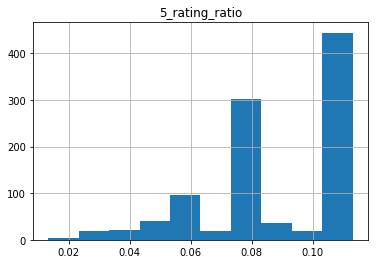

In [103]:
tokens_CV.sort_values('5_rating_ratio',ascending=True).head(1000).hist('5_rating_ratio')